## **Establish connection with GitHub using SSH protocol.**

In [1]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ssh keys were generated earlier. Private and Public keys are stored in 
# 'colabkey' and 'colabkey.pub' files. Additionally a config file is also 
# stored in /content/drive/MyDrive/ssh_keys/ on google drive.

# Remove ssh folder and its contents if already present
!rm -rf /root/.ssh

# Create a directory
!mkdir /root/.ssh

# Copy everything (ssh_key files & config file) from google drive to Virtual Machine.  
!cp /content/drive/MyDrive/ssh_keys/* /root/.ssh

# Set permission
!chmod 700 /root/.ssh  

In [3]:
# Add the git server as an ssh known host
!touch /root/.ssh/known_hosts

# Trust github  
!ssh-keyscan github.com >> /root/.ssh/known_hosts

# Set permission  
!chmod 644 /root/.ssh/known_hosts 

# github.com:22 SSH-2.0-babeld-077acb5b
# github.com:22 SSH-2.0-babeld-077acb5b
# github.com:22 SSH-2.0-babeld-077acb5b
# github.com:22 SSH-2.0-babeld-077acb5b
# github.com:22 SSH-2.0-babeld-077acb5b


In [4]:
# Run ssh-agent and add `ssh-add /root/.ssh/colabkey` in the prompt. 
# After this command, optinally check if the key is saved using `ssh-add -l`, 
# then exit the prompt.
!ssh-agent /bin/bash

bash: cannot set terminal process group (912): Inappropriate ioctl for device
bash: no job control in this shell
/content# ssh-add /root/.ssh/colabkey
Identity added: /root/.ssh/colabkey (shreyasdb99@gmail.com)
/content# exit
exit


In [5]:
# Check connection with github
!ssh -T git@github.com

Hi shre-db! You've successfully authenticated, but GitHub does not provide shell access.


In [6]:
# Navigate to the project folder  # Please note that you need to remove this line of comment while running the cd command below.
cd drive/MyDrive/ColabProjects/stock-price-prediction-using-RNN-LSTM

/content/drive/MyDrive/ColabProjects/stock-price-prediction-using-RNN-LSTM


In [7]:
!ls

data  notebook.ipynb  README.md


## **Initialize git repository if not already**

In [8]:
# # Initialize the directory as a git repository (if not already)
# !git init

Initialized empty Git repository in /content/drive/MyDrive/ColabProjects/stock-price-prediction-using-RNN-LSTM/.git/


In [9]:
# # Configure user name and email (if not already)
# !git config user.name "shre-db"
# !git config user.email "shreyasdb99@gmail.com"

In [10]:
# # Check Staging Area
# !git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	notebook.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [11]:
# # Add Commit and Push
# !echo "# Stock Price Prediction using RNN-LSTM" >> README.md
# !git add README.md notebook.ipynb
# !git commit -m "Add README and notebook" -m "This commit includes a README file and a notebook containing code for preliminary setup."
# !git branch -M main
# !git remote add origin git@github.com:shre-db/stock-price-prediction-using-RNN-LSTM.git
# !git push -u origin main

[master (root-commit) 8e57e87] Add README and notebook
 2 files changed, 2 insertions(+)
 create mode 100644 README.md
 create mode 100644 notebook.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 2.81 KiB | 574.00 KiB/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To github.com:shre-db/stock-price-prediction-using-RNN-LSTM.git
 * [new branch]      main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


## **Use cells in this section to execute commands**

In [8]:
!git status 

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   notebook.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	data/

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git pull

In [44]:
!git add notebook.ipynb
!git commit -m "Update notebook.ipynb" -m "Trained a LSTM model with "
!git push

[main 36d6970] Update notebook.ipynb
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 33.40 KiB | 3.04 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0)
To github.com:shre-db/stock-price-prediction-using-RNN-LSTM.git
   8e57e87..36d6970  main -> main


## **Working with Data**

In [8]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

import sys

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [10]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU {torch.cuda.get_device_name(0)} is available")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU instead")

GPU Tesla T4 is available


In [11]:
# Load the data
data_org = pd.read_csv('data/MSFT.csv')

# Make a copy of the data
data = data_org.copy()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400
...,...,...,...,...,...,...,...
9333,2023-03-24,277.239990,280.630005,275.279999,280.570007,280.570007,28172000
9334,2023-03-27,280.500000,281.459991,275.519989,276.380005,276.380005,26840200
9335,2023-03-28,275.790009,276.140015,272.049988,275.230011,275.230011,21878600
9336,2023-03-29,278.959991,281.140015,278.410004,280.510010,280.510010,25087000


In [12]:
# Drop all columns except 'Date' and 'Closing price'
data = data[['Date', 'Close']]
data

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9333,2023-03-24,280.570007
9334,2023-03-27,276.380005
9335,2023-03-28,275.230011
9336,2023-03-29,280.510010


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9338 entries, 0 to 9337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9338 non-null   object 
 1   Close   9338 non-null   float64
dtypes: float64(1), object(1)
memory usage: 146.0+ KB


In [14]:
data = pd.concat([pd.to_datetime(data['Date']), data['Close']], axis=1)
data

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9333,2023-03-24,280.570007
9334,2023-03-27,276.380005
9335,2023-03-28,275.230011
9336,2023-03-29,280.510010


In [15]:
data.index = data.pop('Date')
data

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-03-24,280.570007
2023-03-27,276.380005
2023-03-28,275.230011


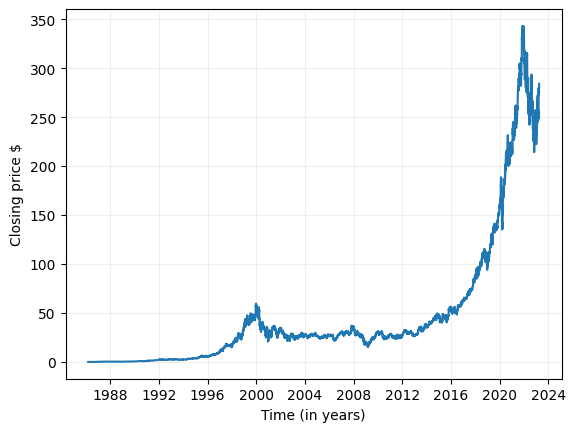

In [16]:
sns.lineplot(data=data, x='Date', y='Close')
plt.xlabel('Time (in years)')
plt.ylabel('Closing price $')
plt.grid(alpha=0.2)
plt.show()

In [17]:
# Covert the data to pytorch tensor
price = torch.tensor(data['Close'])
price.shape

torch.Size([9338])

In [18]:
# Split the data into training set -> 80%, validation set -> 10% and test set -> 10%
train_set = price[:int(0.8*len(price))]
val_set = price[int(0.8*len(price)):int(0.9*len(price))]
test_set = price[int(0.9*len(price)):]

In [30]:
# Create a class for the DL model
class LSTMnet(nn.Module):
  def __init__(self, input_size, num_hidden, num_layers, do_print=False):
    super().__init__()

    # hyperparameters
    self.input_size = input_size
    self.num_hidden = num_hidden
    self.num_layers = num_layers
    self.do_print = do_print

    # LSTM layer
    self.lstm = nn.LSTM(input_size, num_hidden, num_layers)

    # Output layer
    self.output = nn.Linear(num_hidden, 1)

  def forward(self, X):
    if self.do_print: print(f'Input: {list(X.shape)}')

    # run through the RNN layer
    y,hidden = self.lstm(X)
    if self.do_print: print(f'RNN-out: {list(y.shape)}')
    if self.do_print: print(f'RNN-hidden: {list(hidden[0].shape)}')
    if self.do_print: print(f'RNN-cell: {list(hidden[1].shape)}')

    # pass the LSTM output through the linear output layer
    output = self.output(y)
    if self.do_print: print(f'Output: {list(output.shape)}')

    return output, hidden

In [31]:
# Test the model with some data
# Network parameters
input_size = 1
num_hidden = 16 
num_layers = 2
seqlength = 16
batchsize = 1

net = LSTMnet(input_size, num_hidden, num_layers, do_print=True)

X = train_set[:seqlength].view(seqlength, batchsize, input_size).to(net.lstm.weight_ih_l0.dtype)
y = train_set[seqlength].view(1,1)

yHat, (h,c) = net(X)

# Fetch the final prediction
pred = yHat[-1]

lossfun = nn.MSELoss()
lossfun(pred, y)

Input: [16, 1, 1]
RNN-out: [16, 1, 16]
RNN-hidden: [2, 1, 16]
RNN-cell: [2, 1, 16]
Output: [16, 1, 1]


tensor(0.0006, dtype=torch.float64, grad_fn=<MseLossBackward0>)

## **Train the model and show performance**

In [38]:
# hyperparameters
numepochs = 1
input_size = 1
num_hidden = 16
num_layers = 2
seqlength = 16
batchsize = 1

# Create a new instance of the model
net = LSTMnet(input_size, num_hidden, num_layers)
net.to(device)

# Select an optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# Select an appropriate loss function for gradient descent
lossfunction = nn.MSELoss()
lossfunction.to(device)

# Initialize losses
train_losses = np.zeros(numepochs)
val_losses = np.zeros(numepochs)

# Loop over epochs
# ----------------
for epoch in range(numepochs):

  # Switch to training mode
  net.train()

  # Initialize segment losses and accuracy
  seglosses = []
  # segacc = []

  # # Reset the hidden state and cell state on each epoch
  # h = torch.zeros(num_layers,batchsize,num_hidden).to(device)
  # c = torch.zeros(num_layers,batchsize,num_hidden).to(device)


  # Loop over segments of time series training set
  # ----------------------------------------------
  for timei in range(len(train_set)-seqlength):
    # Get the input and target sequences
    X = train_set[timei:timei+seqlength].view(seqlength, batchsize, input_size)
    y = train_set[timei+seqlength].view(1,1)

    X = X.to(net.lstm.weight_ih_l0.dtype).to(device)
    y = y.to(torch.float).to(device)

    # Forward pass
    yHat,(h,c) = net(X)
    pred = yHat[-1]

    # Compute the Loss
    loss = lossfunction(pred, y)

    # Back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store losses and accuracy
    seglosses.append(loss.item())

    msg = f'Finished epoch {timei+1}/{len(train_set)-seqlength}'
    sys.stdout.write('\r' + msg) 
  
  # Compute the average training loss
  train_losses[epoch] = np.mean(seglosses)

  # Switch to eval mode
  net.eval()
  
  # Initialize segment losses and accuracy
  seglosses = []
  # segacc = []

  # Loop over the segments of time series validation set
  # ----------------------------------------------------
  for timei in range(len(val_set)-seqlength):
    # Get the inputs and target sequences
    X = val_set[timei:timei+seqlength].view(seqlength, batchsize, input_size)
    y = val_set[timei+seqlength].view(1,1)

    X = X.to(net.lstm.weight_ih_l0.dtype).to(device)
    y = y.to(torch.float).to(device)

    # Forward pass with autograd deactivated
    with torch.no_grad():
      # Forward pass
      yHat,(h,c) = net(X)
      pred = yHat[-1]

      # Compute the Loss
      loss = lossfunction(pred, y)

      # Store losses and accuracy
      seglosses.append(loss.item())

    msg = f'Finished epoch {timei+1}/{len(val_set)-seqlength}'
    sys.stdout.write('\r' + msg)

  # Compute and store the average validation loss
  val_losses[epoch] = np.mean(seglosses)

  msg = f'Finished epoch {epoch+1}/{numepochs}'
  sys.stdout.write('\r' + msg) 


Finished epoch 1/1